PROBLEM: Employee satisfaction bisa berpengaruh terhadap kinerja kerja dan akan berdampak terhadap KPI dalam perusahaan
oleh karena itu, dalam project ini, saya ingin melihat apa saja yang dapat dilakukan oleh HR dalam hiring agar kecenderungan staff yang akan direkrut adalah staff yang akan memiliki tingkat kepuasan kerja tinggi di dalam perusahaan tersebut

PROJECT: project ini akan dilakukan untuk memprediksi faktor apa saja yang membuat seorang staff puas bekerja di perusahaan tsb.

dalam bagian ini, saya menggunakan yang terbaik dari yang terburuk, yaitu KNN dengan Standard Scaler

(mencoba boosting dengan PCA SVM kalau berhasil)

Python Packages



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

SciKit Learn Package

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score, classification_report, confusion_matrix, recall_score, log_loss, roc_auc_score, auc, roc_curve
auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('converted.csv',index_col=0)

In [22]:
df

,age,Dept,location,education,job_level,rating,onsite,awards,certifications,satisfied
0,28,0,0,1,5,2,0,1,0,1
1,50,1,0,1,3,5,1,2,1,0
2,43,1,0,0,4,1,0,2,0,0
3,44,2,1,1,2,3,1,0,0,1
4,33,0,1,0,2,1,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
495,49,0,0,1,2,5,0,6,0,1
496,24,1,0,0,2,4,0,2,0,0
497,34,4,1,1,1,3,0,2,0,1
498,26,1,1,0,2,1,1,1,1,0


In [23]:
X = df.drop(columns='satisfied')
y = df.satisfied

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size=.2,random_state=42)

In [25]:
stdscaler = StandardScaler()
X_train_std = stdscaler.fit_transform(X_train)
X_test_std=stdscaler.fit_transform(X_test)

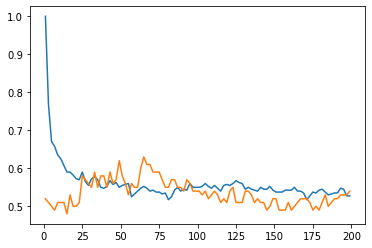

In [26]:
train_scores = []
test_scores = []
for k in range(1,200,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    train_scores.append(knn.score(X_train_std,y_train))
    test_scores.append(knn.score(X_test_std,y_test))
plt.plot(range(1,200,2),train_scores, label='Train')
plt.plot(range(1,200,2),test_scores, label='Test')

In [27]:
k1 = []
for i in range(1,200,2):
    k1.append(i)
k1[np.argmax(test_scores)]

65

KNN + STD SCALER DEFAULT

In [28]:
model = KNeighborsClassifier()
model.fit(X_train_std,y_train)
y_predKNN_std = model.predict(X_test_std)

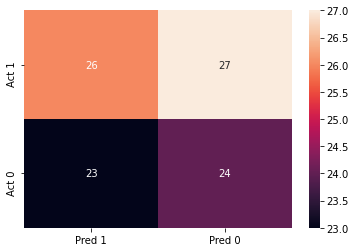

In [29]:
cm=confusion_matrix(y_test,y_predKNN_std,labels=[1,0])
df1 = pd.DataFrame(cm, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df1,annot=True)

KNN + STD SCALER TUNED

In [35]:
model1 = KNeighborsClassifier(weights='uniform',n_neighbors=65,p=2)
model1.fit(X_train_std,y_train)
y_predKNN_std_tuned = model1.predict(X_test_std)

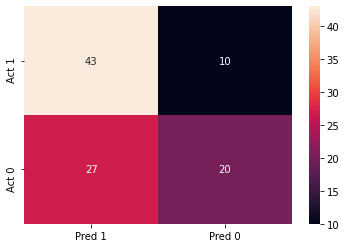

In [36]:
cm=confusion_matrix(y_test,y_predKNN_std_tuned,labels=[1,0])
df1 = pd.DataFrame(cm, columns=['Pred 1','Pred 0'], index=['Act 1','Act 0'])
sns.heatmap(df1,annot=True)

pada dua confusion metrix diatas, pada saat KNN belum di tuning, false positive memiliki angka yang lebih tinggi dari true positive, yang dengan kata lain, mesin banyak menebak staff yang tidak puas sebagai puas. oleh karena itu, saya melakukan tuning agar dapat menurunkan nilai angka false positive dan menaikan angka true positive
sehingga, mesin menebak true positive lebih banyak dari false positive, walaupun mesin tetap memiliki angka false positive yang masih tinggi

In [32]:
print(classification_report(y_test,y_predKNN_std))

precision    recall  f1-score   support

           0       0.47      0.51      0.49        47
           1       0.53      0.49      0.51        53

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100



In [33]:
print(classification_report(y_test,y_predKNN_std_tuned))

precision    recall  f1-score   support

           0       0.48      0.21      0.29        47
           1       0.53      0.79      0.64        53

    accuracy                           0.52       100
   macro avg       0.50      0.50      0.47       100
weighted avg       0.51      0.52      0.48       100



data diatas adalah classification report dari 2 KNN + Standard Scaler, dimana tabel yang diatas adalah tabel yang belum di tuning dan menggunakan parameter default, sedangkan yang bawah adalah yang menggunakan parameter tuning
data
sayangnya, data ini memiliki precision yang rendah pada pilihan satisfied maupun not satisfied.
sedangkan recall pada not satisfied memiliki tingkat recall yang sangat rendah, namun memiliki tingkat recall yang cukup dalam menebak satisfied.
sehingga, model akan mencari 'satisfied' sebanyak-banyaknya

In [43]:
with open ('ModelSatisfied','wb') as ML:
    pickle.dump(model1,ML)